In [1]:
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install pandas
! pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from PIL import Image

In [4]:
from tensorflow import keras

In [27]:
import os
from PIL import Image

data_dir = 'data'

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify image integrity
        except (IOError, SyntaxError):
            print(f"Removing corrupted file: {file_path}")
            os.remove(file_path)

Removing corrupted file: data\Cat\Thumbs.db


d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Removing corrupted file: data\Dog\Thumbs.db


In [28]:
def img_processing(image, label):
    image = tf.cast(image/255.,tf.float32)
    return image, label

In [29]:
train = keras.utils.image_dataset_from_directory(
    directory='data', 
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split = 0.2,
    subset = 'training',
    seed = 123
).map(img_processing).apply(tf.data.experimental.ignore_errors())

validate = keras.utils.image_dataset_from_directory(
    directory='data', 
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split = 0.2, 
    subset = 'validation',
    seed = 123
).map(img_processing).apply(tf.data.experimental.ignore_errors())

Found 24959 files belonging to 2 classes.
Using 19968 files for training.
Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.
Found 24959 files belonging to 2 classes.
Using 4991 files for validation.


In [30]:
train = train.map(img_processing)
validate = validate.map(img_processing)

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

In [32]:
model = Sequential()

model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
    input_shape=(256,256,3)
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 128,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Flatten())
model.add(Dense(
    units = 128,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.2))
model.add(Dense(
    units = 64,
    activation = tf.keras.activations.relu,
))
model.add(Dropout(0.2))
model.add(Dense(
    units = 1,
    activation = tf.keras.activations.sigmoid
))

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
res = model.fit(train, epochs=10, validation_data = validate)

Epoch 1/10
    618/Unknown 291s 468ms/step - accuracy: 0.5012 - loss: 0.6940

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


618/618 ━━━━━━━━━━━━━━━━━━━━ 306s 493ms/step - accuracy: 0.5012 - loss: 0.6940 - val_accuracy: 0.4891 - val_loss: 0.6940
Epoch 2/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 303s 490ms/step - accuracy: 0.4987 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6937
Epoch 3/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 310s 501ms/step - accuracy: 0.4906 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6937
Epoch 4/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 314s 507ms/step - accuracy: 0.4931 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6937
Epoch 5/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 309s 499ms/step - accuracy: 0.4943 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6937
Epoch 6/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 309s 499ms/step - accuracy: 0.4954 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6938
Epoch 7/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 320s 516ms/step - accuracy: 0.4904 - loss: 0.6934 - val_accuracy: 0.4891 - val_loss: 0.6937
Epoch 8/10
618/618 ━━━━━━━━━━━━━━━━━━━━ 312s 505ms/step - accuracy: 0.4937 - loss: 0.69

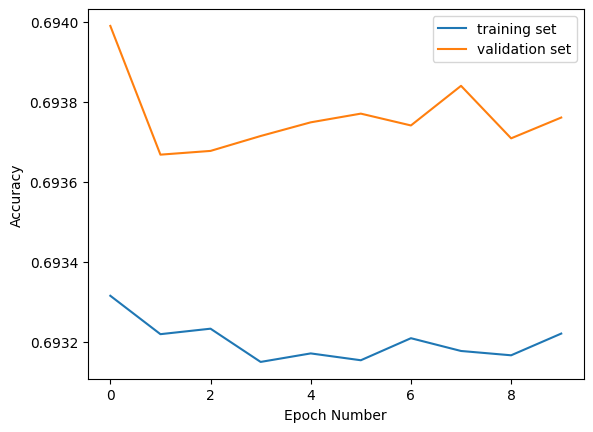

In [37]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(res.history['loss'], label='training set')
plt.plot(res.history['val_loss'], label='validation set')
plt.legend()